In [185]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [186]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [187]:
import pandas as pd
import seaborn as sns
import wbgapi as wb
import numpy as np
import matplotlib.pyplot as plt
import requests

Getting data about CO2 emissions per capita of all countries on OWID

In [188]:
co = pd.read_csv("https://ourworldindata.org/grapher/co-emissions-per-capita.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'}) #got this code directly from OWID
co_filter = co[(co['Year'] >= 2000) & (co['Year'] <= 2024)]
co_filtered = co_filter.rename(columns={'Entity':'Country','emissions_total_per_capita':'Emission rate'}) #renaming it to make it easier
print(co_filtered.head())

        Country Code  Year  Emission rate
51  Afghanistan  AFG  2000       0.052017
52  Afghanistan  AFG  2001       0.052706
53  Afghanistan  AFG  2002       0.062727
54  Afghanistan  AFG  2003       0.068605
55  Afghanistan  AFG  2004       0.052513


Since we also want to work only with Asian countries, we filter out only Asian countries from this list

In [189]:
asian_countries = {
    'AFG': 'South Asia','BGD': 'South Asia','BTN': 'South Asia','IND': 'South Asia','NPL': 'South Asia','PAK': 'South Asia','LKA': 'South Asia',
    'CHN': 'East Asia','HKG': 'East Asia','JPN': 'East Asia','MAC': 'East Asia','MNG': 'East Asia','PRK': 'East Asia','KOR': 'East Asia','TWN': 'East Asia',
    'BRN': 'Southeast Asia','KHM': 'Southeast Asia','TLS': 'Southeast Asia','IDN': 'Southeast Asia','LAO': 'Southeast Asia','MYS': 'Southeast Asia','PHL': 'Southeast Asia','SGP': 'Southeast Asia','THA': 'Southeast Asia','VNM': 'Southeast Asia',
    'KAZ': 'Central Asia','KGZ': 'Central Asia','TJK': 'Central Asia','TKM': 'Central Asia','UZB': 'Central Asia',
    'ARM': 'West Asia','AZE': 'West Asia','BHR': 'West Asia','CYP': 'West Asia','GEO': 'West Asia','IRQ': 'West Asia','ISR': 'West Asia','JOR': 'West Asia','KWT': 'West Asia','LBN': 'West Asia','OMN': 'West Asia','PSE': 'West Asia','QAT': 'West Asia','SAU': 'West Asia','SYR': 'West Asia','TUR': 'West Asia','ARE': 'West Asia',

}
co_asia = co_filtered[co_filtered['Code'].isin(asian_countries)].copy()
co_asia.loc[:, 'Region']=co_asia['Code'].map(asian_countries)
print(co_asia)

           Country Code  Year  Emission rate          Region
51     Afghanistan  AFG  2000       0.052017      South Asia
52     Afghanistan  AFG  2001       0.052706      South Asia
53     Afghanistan  AFG  2002       0.062727      South Asia
54     Afghanistan  AFG  2003       0.068605      South Asia
55     Afghanistan  AFG  2004       0.052513      South Asia
...            ...  ...   ...            ...             ...
25741      Vietnam  VNM  2019       3.490108  Southeast Asia
25742      Vietnam  VNM  2020       3.695581  Southeast Asia
25743      Vietnam  VNM  2021       3.173521  Southeast Asia
25744      Vietnam  VNM  2022       2.985874  Southeast Asia
25745      Vietnam  VNM  2023       3.335514  Southeast Asia

[1128 rows x 5 columns]


Using World Bank, getting information about GDP per capita of all countries

In [190]:
gdp = wb.data.DataFrame("NY.GDP.PCAP.CD", time=range(2000, 2025))
print(gdp.head())
gdp_long = gdp.reset_index().melt( #the world bank's data was in wide format, but we need a long format, so we change it using melt()
    id_vars='economy', #the identifier 
    var_name='Year', #since in the WB data all columns contained seperate years like YR2000, we making them all one column called Year
    value_name='GDP' #same but with GDP
)
gdp_long['Year'] = gdp_long['Year'].str.replace('YR','').astype(int) #deleting the YR in YR2000-YR2023
gdp_long = gdp_long.rename(columns={'economy':'Code'}) #renaming it to make it easier
print(gdp_long.head())

               YR2000        YR2001        YR2002        YR2003        YR2004  \
economy                                                                         
ABW      20681.023027  20740.132583  21307.248251  21949.485996  23700.631990   
AFE        707.120378    626.169150    625.998816    809.968140    981.744632   
AFG        174.930991    138.706822    178.954088    198.871116    221.763654   
AFW        516.932316    530.653168    616.796033    694.500938    840.252085   
AGO        563.733796    533.586202    882.147847    992.698979   1266.210864   

               YR2005        YR2006        YR2007        YR2008        YR2009  \
economy                                                                         
ABW      24171.837133  24845.658484  26736.308944  28171.909401  25134.771230   
AFE       1115.713957   1220.002469   1362.310652   1421.118613   1386.590250   
AFG        254.184249    274.218554    376.223152    381.733238    452.053705   
AFW       1001.604607   123

Only Asian countries' GDP per capita

In [191]:
gdp_asia = gdp_long[gdp_long['Code'].isin(asian_countries)]
print(gdp_asia)

     Code  Year           GDP
2     AFG  2000    174.930991
8     ARE  2000  29865.502347
10    ARM  2000    593.450582
15    AZE  2000    655.097250
20    BGD  2000    396.670730
...   ...   ...           ...
6619  TKM  2024   8571.607029
6621  TLS  2024   1343.148860
6628  TUR  2024  15473.287264
6636  UZB  2024   3161.700106
6641  VNM  2024   4717.290287

[1150 rows x 3 columns]


Getting literacy level of all countries on World Bank

In [192]:
edu = wb.data.DataFrame("SE.ADT.LITR.ZS", time=range(2000, 2025))
print(edu.head())
edu_long = edu.reset_index().melt(
    id_vars='economy',
    var_name='Year',
    value_name='Lit'
)
edu_long['Year'] = edu_long['Year'].str.replace('YR','').astype(int) #everything same as with GDP
edu_long = edu_long.rename(columns={'economy':'Code'})
print(edu_long.head())

            YR2000     YR2001    YR2002     YR2003     YR2004     YR2005  \
economy                                                                    
ABW      97.290001        NaN       NaN        NaN        NaN        NaN   
AFE      62.666618  63.157761  63.83762  64.334061  64.574913  63.941471   
AFG            NaN        NaN       NaN        NaN        NaN        NaN   
AFW      47.622810  48.817509  49.55825  50.144859  51.485821  51.608898   
AGO            NaN  67.410004       NaN        NaN        NaN        NaN   

            YR2006     YR2007     YR2008     YR2009  ...     YR2015  \
economy                                              ...              
ABW            NaN        NaN        NaN        NaN  ...        NaN   
AFE      61.945911  62.969959  63.228230  63.960812  ...  70.237839   
AFG            NaN        NaN        NaN        NaN  ...  33.750000   
AFW      52.296558  50.303822  50.750198  50.847118  ...  55.410019   
AGO            NaN        NaN        NaN 

Point summary of all data above

In [193]:
edu_asia = edu_long[gdp_long['Code'].isin(asian_countries)]
print(edu_asia)

     Code  Year  Lit
2     AFG  2000  NaN
8     ARE  2000  NaN
10    ARM  2000  NaN
15    AZE  2000  NaN
20    BGD  2000  NaN
...   ...   ...  ...
6619  TKM  2024  NaN
6621  TLS  2024  NaN
6628  TUR  2024  NaN
6636  UZB  2024  NaN
6641  VNM  2024  NaN

[1150 rows x 3 columns]


In [194]:
co_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5544.0,2011.500000,6.922811,2000.0,2005.750000,2011.500000,2017.250000,2023.00000
Emission rate,5544.0,5.106126,6.338801,0.0,0.879378,3.170213,7.177857,67.58374


In [195]:
edu_long.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6650.0,2012.000000,7.211645,2000.00,2006.000000,2012.00000,2018.000000,2024.0
Lit,1863.0,80.485527,16.848101,14.38,67.200718,85.95665,94.720001,100.0


In [196]:
gdp_long.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6650.0,2012.000000,7.211645,2000.000000,2006.000000,2012.000000,2018.000000,2024.000000
GDP,6413.0,14831.301378,23313.101751,109.593814,1554.126103,5083.606955,18686.405096,256580.515123


In [197]:
gdp_asia.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1150.0,2012.000000,7.214240,2000.000000,2006.00000,2012.000000,2018.00000,2024.000000
GDP,1120.0,13470.509818,18475.310596,136.925716,1380.16018,4107.295723,22061.25195,108470.378825


In [198]:
co_asia.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1128.0,2011.500000,6.925257,2000.000000,2005.750000,2011.500000,2017.250000,2023.00000
Emission rate,1128.0,7.167019,9.371634,0.052017,1.133851,3.443355,9.479314,67.58374


Information about data

In [199]:
co_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5544 entries, 51 to 26277
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        5544 non-null   object 
 1   Code           5160 non-null   object 
 2   Year           5544 non-null   int64  
 3   Emission rate  5544 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 216.6+ KB


In [200]:
gdp_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    6650 non-null   object 
 1   Year    6650 non-null   int64  
 2   GDP     6413 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 156.0+ KB


In [201]:
edu_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    6650 non-null   object 
 1   Year    6650 non-null   int64  
 2   Lit     1863 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 156.0+ KB


In [202]:
co_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 51 to 25745
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1128 non-null   object 
 1   Code           1128 non-null   object 
 2   Year           1128 non-null   int64  
 3   Emission rate  1128 non-null   float64
 4   Region         1128 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 52.9+ KB


In [203]:
gdp_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, 2 to 6641
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    1150 non-null   object 
 1   Year    1150 non-null   int64  
 2   GDP     1120 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.9+ KB


In [204]:
edu_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, 2 to 6641
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    1150 non-null   object 
 1   Year    1150 non-null   int64  
 2   Lit     304 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.9+ KB


Checking for null data and dropping if have

In [205]:
print(co_filtered.isna().any())

Country          False
Code              True
Year             False
Emission rate    False
dtype: bool


In [206]:
print(gdp_long.isna().any())
gdp_filtered = gdp_long.dropna()
print(gdp_filtered)

Code    False
Year    False
GDP      True
dtype: bool
     Code  Year           GDP
0     ABW  2000  20681.023027
1     AFE  2000    707.120378
2     AFG  2000    174.930991
3     AFW  2000    516.932316
4     AGO  2000    563.733796
...   ...   ...           ...
6644  WSM  2024   4898.771408
6645  XKX  2024   7299.434981
6647  ZAF  2024   6253.371582
6648  ZMB  2024   1235.084665
6649  ZWE  2024   2656.409377

[6413 rows x 3 columns]


In [207]:
print(edu_long.isna().any())
edu_filtered=edu_long.dropna()
print(edu_filtered)

Code    False
Year    False
Lit      True
dtype: bool
     Code  Year        Lit
0     ABW  2000  97.290001
1     AFE  2000  62.666618
3     AFW  2000  47.622810
7     ARB  2000  65.156418
16    BDI  2000  59.299999
...   ...   ...        ...
6625  TSS  2024  68.685623
6633  UMC  2024  96.169388
6634  URY  2024  98.910004
6643  WLD  2024  87.740700
6647  ZAF  2024  91.150002

[1863 rows x 3 columns]


In [208]:
print(co_asia.isna().any())

Country          False
Code             False
Year             False
Emission rate    False
Region           False
dtype: bool


In [209]:
print(gdp_asia.isna().any())
gdp_asia_filtered = gdp_asia.dropna()
print(gdp_asia_filtered)

Code    False
Year    False
GDP      True
dtype: bool
     Code  Year           GDP
2     AFG  2000    174.930991
8     ARE  2000  29865.502347
10    ARM  2000    593.450582
15    AZE  2000    655.097250
20    BGD  2000    396.670730
...   ...   ...           ...
6619  TKM  2024   8571.607029
6621  TLS  2024   1343.148860
6628  TUR  2024  15473.287264
6636  UZB  2024   3161.700106
6641  VNM  2024   4717.290287

[1120 rows x 3 columns]


In [210]:
print(edu_asia.isna().any())
edu_asia_filtered=edu_asia.dropna()
print(edu_asia_filtered)

Code    False
Year    False
Lit      True
dtype: bool
     Code  Year        Lit
40    CHN  2000  90.919998
113   IRQ  2000  74.050003
129   LAO  2000  69.580002
163   MNG  2000  97.769997
169   MYS  2000  88.690002
...   ...   ...        ...
6392  ARE  2024  98.809998
6406  BHR  2024  97.820000
6466  GEO  2024  99.680000
6580  PSE  2024  97.944980
6589  SAU  2024  97.930000

[304 rows x 3 columns]


Merging two dataframes so we can work with them and calculate everything we need later, since we are working with multiple seperate (different) datasets, not one

In [211]:
#co2 emissions per capita with GDP level of All counties 
co_ready = co_filtered[['Country','Code','Year','Emission rate']]
gdp_ready = gdp_filtered[['Code','Year','GDP']]
merge_co_gdp = co_ready.merge(gdp_ready, on=['Code','Year'])
print(merge_co_gdp)

          Country Code  Year  Emission rate          GDP
0     Afghanistan  AFG  2000       0.052017   174.930991
1     Afghanistan  AFG  2001       0.052706   138.706822
2     Afghanistan  AFG  2002       0.062727   178.954088
3     Afghanistan  AFG  2003       0.068605   198.871116
4     Afghanistan  AFG  2004       0.052513   221.763654
...           ...  ...   ...            ...          ...
4786     Zimbabwe  ZWE  2019       0.672038  1683.913136
4787     Zimbabwe  ZWE  2020       0.547083  1730.453910
4788     Zimbabwe  ZWE  2021       0.645913  1724.387271
4789     Zimbabwe  ZWE  2022       0.648759  2040.546587
4790     Zimbabwe  ZWE  2023       0.683199  2156.034093

[4791 rows x 5 columns]


In [212]:
#Asian countries GDP and CO2 emissions only
co_ready = co_asia[['Country','Code','Year','Emission rate','Region']]
gdp_asia_ready = gdp_asia_filtered[['Code','Year','GDP']]
merge_co_gdp_asia = co_ready.merge(gdp_asia_ready, on=['Code','Year'])
print(merge_co_gdp_asia)

          Country Code  Year  Emission rate          Region          GDP
0     Afghanistan  AFG  2000       0.052017      South Asia   174.930991
1     Afghanistan  AFG  2001       0.052706      South Asia   138.706822
2     Afghanistan  AFG  2002       0.062727      South Asia   178.954088
3     Afghanistan  AFG  2003       0.068605      South Asia   198.871116
4     Afghanistan  AFG  2004       0.052513      South Asia   221.763654
...           ...  ...   ...            ...             ...          ...
1075      Vietnam  VNM  2019       3.490108  Southeast Asia  3440.900254
1076      Vietnam  VNM  2020       3.695581  Southeast Asia  3534.039535
1077      Vietnam  VNM  2021       3.173521  Southeast Asia  3704.193559
1078      Vietnam  VNM  2022       2.985874  Southeast Asia  4147.697772
1079      Vietnam  VNM  2023       3.335514  Southeast Asia  4323.350320

[1080 rows x 6 columns]


In [213]:
#CO2 emission rate and Literacy level of all countries 
co_ready = co_filtered[['Country','Code','Year','Emission rate']]
edu_ready = edu_filtered[['Code','Year','Lit']]
merge_co_edu = co_ready.merge(edu_ready, on=['Code','Year'])
print(merge_co_edu)

         Country Code  Year  Emission rate        Lit
0    Afghanistan  AFG  2011       0.403381  31.450001
1    Afghanistan  AFG  2015       0.285831  33.750000
2    Afghanistan  AFG  2020       0.297063  35.986555
3    Afghanistan  AFG  2021       0.256794  37.270000
4        Albania  ALB  2001       1.023099  98.709999
..           ...  ...   ...            ...        ...
877       Zambia  ZMB  2020       0.427314  81.759154
878       Zambia  ZMB  2021       0.397158  79.945009
879       Zambia  ZMB  2022       0.373235  79.975143
880       Zambia  ZMB  2023       0.373911  82.041806
881     Zimbabwe  ZWE  2019       0.672038  93.230003

[882 rows x 5 columns]


In [214]:
#CO2 emission rate and Literacy level of Asian countries 
co_ready = co_filtered[['Country','Code','Year','Emission rate']]
edu_asia_ready = edu_asia_filtered[['Code','Year','Lit']]
merge_co_edu_asia = co_ready.merge(edu_asia_ready, on=['Code','Year'])
print(merge_co_edu_asia)

         Country Code  Year  Emission rate         Lit
0    Afghanistan  AFG  2011       0.403381   31.450001
1    Afghanistan  AFG  2015       0.285831   33.750000
2    Afghanistan  AFG  2020       0.297063   35.986555
3    Afghanistan  AFG  2021       0.256794   37.270000
4        Armenia  ARM  2001       1.145363   99.400002
..           ...  ...   ...            ...         ...
294   Uzbekistan  UZB  2022       3.578780  100.000000
295      Vietnam  VNM  2000       0.699062   90.160004
296      Vietnam  VNM  2009       1.439895   93.519997
297      Vietnam  VNM  2019       3.490108   95.750000
298      Vietnam  VNM  2022       2.985874   96.129997

[299 rows x 5 columns]


Research Questions 1: What is the relationship between CO2 emissions per capita and GDP per capita of all countries?  
Null Hypothesis: There is no relationship between CO2 emissions per capita and GDP per capita of all countries
Hypothesis 1: Countries with higher GPD per capita have more CO2 emissions per capita

<Axes: xlabel='GDP', ylabel='Emission rate'>

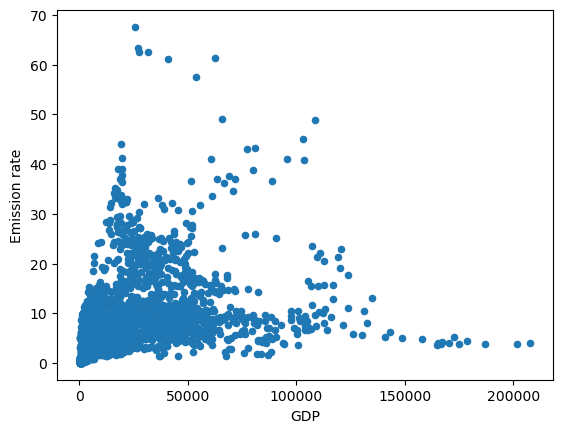

In [215]:
merge_co_gdp.plot.scatter('GDP','Emission rate')

In [216]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(merge_co_gdp['GDP'], merge_co_gdp['Emission rate'])
print("Correlation:", corr)
print("p-value:", p_value)
if p_value>=0.05:
  print("accept the null hypothesis")
else:
  print("rejecting the null hypothesis")

Correlation: 0.49104457039263305
p-value: 2.7438351915934954e-289
rejecting the null hypothesis


Conclusion: The correlation analysis shows a moderate positive relationship between CO2 emissions per capita and GDP per capita (correlation coefficient = 0.49). The p-value (2.74e-289) is far below the 0.05 significance level, indicating that the result is statistically significant. Therefore, the null hypothesis is rejected, and we accept the alternative hypothesis that countries with higher GDP per capita tend to have higher CO2 emissions per capita. This suggests that as economic activity and income levels increase, carbon emissions also tend to rise

Research Questions 2: What is the relationship between CO2 emissions per capita and GDP per capita of Asian countries?
Null Hypothesis 1: There is no relationship between CO2 emissions per capita and GDP per capita of Asian countries.

<Axes: xlabel='GDP', ylabel='Emission rate'>

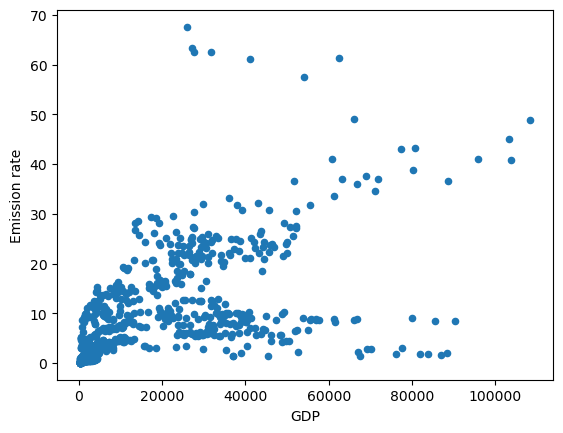

In [217]:
merge_co_gdp_asia.plot.scatter('GDP','Emission rate')

In [218]:
corr, p_value = pearsonr(merge_co_gdp_asia['GDP'], merge_co_gdp_asia['Emission rate'])
print("Correlation:", corr)
print("p-value:", p_value)
if p_value>=0.05:
  print("accept the null hypothesis")
else:
  print("rejecting the null hypothesis")

Correlation: 0.6329331080454598
p-value: 5.90483601277404e-122
rejecting the null hypothesis


Conclusion: The correlation analysis indicates a strong positive relationship between CO2 emissions per capita and GDP per capita among Asian countries (correlation coefficient = 0.63). The p-value (5.90e-122) is significantly below the 0.05 showing that the result is statistically significant. Therefore, the null hypothesis is rejected, and we accept the alternative hypothesis that higher GDP per capita is associated with higher CO₂ emissions per capita in Asia

We also decided to test the correlation of different regions of Asia (South Asia, Southeast Asia, Central Asia, East Asia). It is not included in the Research Question and Hypothesis, just for our own observation and possible future investigation.

In [219]:
correlation=merge_co_gdp_asia.groupby('Region')[['GDP','Emission rate']].corr()
print(correlation)

                                   GDP  Emission rate
Region                                               
Central Asia   GDP            1.000000       0.826531
               Emission rate  0.826531       1.000000
East Asia      GDP            1.000000      -0.223625
               Emission rate -0.223625       1.000000
South Asia     GDP            1.000000       0.649072
               Emission rate  0.649072       1.000000
Southeast Asia GDP            1.000000       0.679027
               Emission rate  0.679027       1.000000
West Asia      GDP            1.000000       0.764568
               Emission rate  0.764568       1.000000


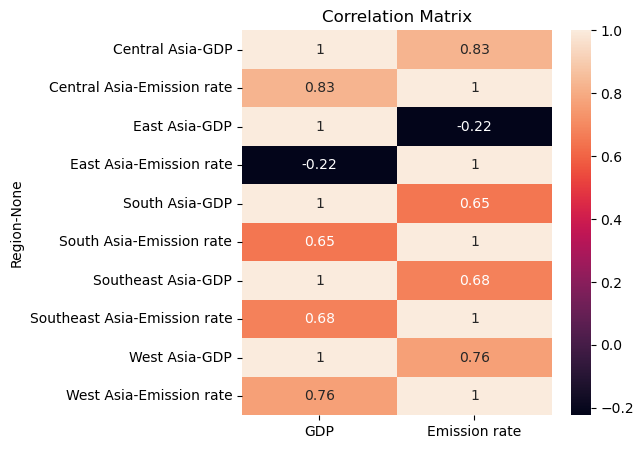

In [220]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix")
plt.show()

Interestingly, the strongest positive correlation of CO2 emissions and GDP is shown in Central Asia (corr=0.83), meaning higher the GDP level, higher the CO2 emissions. Same with South Asia (0.65), Southeast Asia (0.68) and West Asia (0.76). However, East Asia (-0.22) shows a weak negative correlation, implying that high GDP does not result in higher CO2 emissions.

Research Question 3: What is the relationship between CO2 emissions and literacy level of countries?
Null Hypothesis: There is no relationship between CO2 emission and level of literacy in different countries
Hypothesis 1: Countries with more literacy level have more CO2 emission

<Axes: xlabel='Lit', ylabel='Emission rate'>

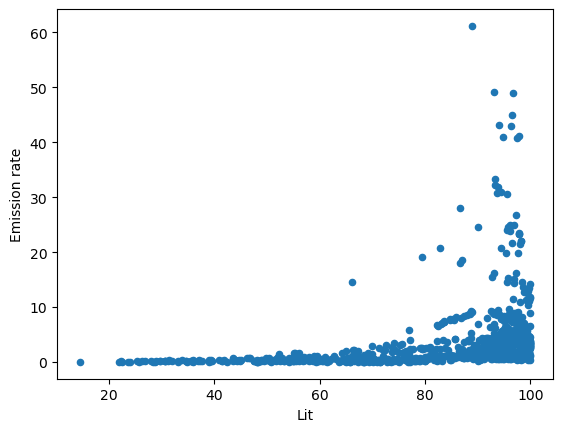

In [221]:
merge_co_edu.plot.scatter('Lit','Emission rate')

In [222]:
corr, p_value = pearsonr(merge_co_edu['Lit'], merge_co_edu['Emission rate'])
print("Correlation:", corr)
print("p-value:", p_value)
if p_value>=0.05:
  print("accept the null hypothesis")
else:
  print("rejecting the null hypothesis")

Correlation: 0.3081595871723244
p-value: 7.405518536153116e-21
rejecting the null hypothesis


Conclusion: The correlation analysis shows a moderate positive relationship between CO2 emissions per capita and literacy levels across countries (corr=0.31). The p-value (7.41e-21) is far below the 0.05 significance level, indicating that the result is statistically significant. Therefore, the null hypothesis is rejected, and the alternative hypothesis is accepted, countries with higher literacy levels tend to have higher CO₂ emissions. However, the moderate positive relationship implies that the literacy level is not a strong predictor of CO2 emissions

Research Question 4: What is the relationship between CO2 emissions and literacy level of Asian countries?
Null Hypothesis: There is no relationship between CO2 emission and level of literacy of Asian countries
Hypothesis 1: Asian countries with more literacy level have more CO2 emission

<Axes: xlabel='Lit', ylabel='Emission rate'>

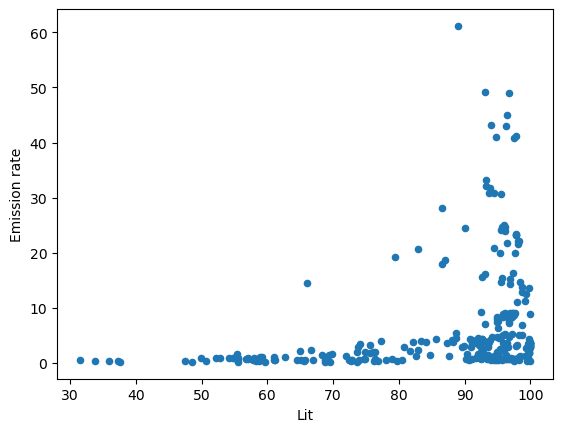

In [223]:
merge_co_edu_asia.plot.scatter('Lit','Emission rate')

In [224]:
corr, p_value = pearsonr(merge_co_edu_asia['Lit'], merge_co_edu_asia['Emission rate'])
print("Correlation:", corr)
print("p-value:", p_value)
if p_value>=0.05:
  print("accept the null hypothesis")
else:
  print("rejecting the null hypothesis")

Correlation: 0.2696174986172553
p-value: 2.2398385898969844e-06
rejecting the null hypothesis


Conslusion: The analysis shows a weak positive relationship between CO₂ emissions per capita and literacy levels among Asian countries (corr 0.27). The p-value (2.24e-6) is well below the 0.05 significance level, indicating that the result is statistically significant. Therefore, the null hypothesis is rejected, and the alternative hypothesis is accepted, Asian countries with higher literacy levels tend to have slightly higher CO₂ emissions. However, the weak positive relationship also indicates that the literacy level is not a strong predictor of CO2 emissions in Asia.